In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

#                               !!!INPUT FILES NEED TO BE CSV FORMAT!!!
#           As usual make sure to format any timestamps in the input files as number,
#           or else this script will read all timestamps as '#.###E+12'

#                                   Changes/input needed to run this script:
#                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#   1. file path for the csv with all timestamps, probably fracBRAIN stage download (sfg.csv).
#   2. file path for the csv with list of timestamps you want to match, i.e. field csv (field.csv)
#   3. file path for the output csv that will be the two files above, merged via vlookup (output.csv)
#   4. make sure both input files have the same header name for timestamp column. Best to use 'timestamp'
#      as the header name.
#   5. select if you want to add an epoch timestamp column to field csv - add_timestamp = "y"
#   6. select if you want to delete the unit row (extra row below headers) - delete_unit_row = "y"
#   7. select a time_offset, if needed, to shift the field csv by x amount of seconds.
#   8. (OPTIONAL) save the file you just added to timestamps to. saves to a new file, does not overwrite.

#   


# file paths for the input and output csv~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# step (1)
path = 'C:\\Users\\rivil\\Downloads'
file_name_sfg = 'Bagpipe State 22 G 86H 8.csv' 
full_path_sfg = os.path.join(path,file_name_sfg)
# step (2)
file_name_field = 'Copy of Occidental Petroleum Corporation_G 86H_Interval_8_DataListing.xlsx'
full_path_field = os.path.join(path,file_name_field)
# step (3)
file_name_sfg_output = file_name_sfg.split(".")[0]+'_out.'+file_name_sfg.split(".")[-1]
full_path_output = os.path.join(path,file_name_sfg_output)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# create dataFrames from files ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# if one file does not have any headers for some reason, remove header=0
df_sfg = pd.read_csv(full_path_sfg, header=0, index_col=None)
df_sfg = df_sfg.iloc[:,:-2]

df_field = pd.read_excel(full_path_field,sheet_name=0,header=0,index_col=False,keep_default_na=True)
#df_field = pd.read_csv(full_path_field, header=0, index_col=None)
df_field = df_field[1:]

# transform objt into floating types
for column in df_field.columns[6:]:
    df_field[column] = df_field[column].map(lambda x: float(x))
df_field.dtypes

print(df_sfg.shape)
print(df_field.shape)

(12108, 98)
(9635, 25)


In [2]:
 # Function to subtract subsequent rows and add empty rows
def subtract_and_add_empty_rows(df, column_name):
    input_min = df.timestamp.min()
    input_max = df.timestamp.max()
    temp_list = []
    counts=0

    for i in range(len(df) - 1):
        temp_list.append(df.at[i, column_name])
        
        diff = int(abs(df.at[i, column_name] - df.at[i + 1, column_name])/1000)
        
        
        if(diff>1.0): 
            for j in range(abs(diff) - 1):
                counts+=1
                temp_list.append(np.nan)  # Adding as many empty rows as the difference

    # Adding the last value from the original DataFrame
    temp_list.append(df.at[len(df) - 1, column_name])

    temp_df = pd.DataFrame({column_name: temp_list})
    temp_df.reset_index(drop=True, inplace=True)
    
   
    temp_merged_df = temp_df.merge(df, how='left', left_on='timestamp', right_on=['timestamp'])
    #result_df.fillna()
    temp_min = temp_merged_df.timestamp.min()
    temp_max = temp_merged_df.timestamp.max()    
    
    print("input data dimensions:", df.shape)
    print("timestamp input values min, max",input_min,input_max)
    print("output data dimensions:", temp_merged_df.shape)
    print("timestamp output values min, max",temp_min,temp_max)
    print("Added emtpy rows:", counts)
    
    return temp_merged_df


In [5]:
# Apply the function
df_sfg_emtpyrows = subtract_and_add_empty_rows(df_sfg, 'timestamp')


input data dimensions: (12108, 98)
timestamp input values min, max 1706674744000 1706687006000
output data dimensions: (12263, 98)
timestamp output values min, max 1706674744000.0 1706687006000.0
Added emtpy rows: 155


In [6]:
df_sfg_emtpyrows[df_sfg_emtpyrows.isna().all(axis=1)]

,timestamp,Time,MRL_Const,Well_Name,Stage,P1,P2,P3,P4,P5,...,PC3_PPS_CH2_Bat,PC3_PPS_CH3_Bat,PC4_Date,PC4_Time,PC4_PPS_CH1,PC4_Perry State_51_6_1H,PC4_PPS_CH3,PC4_Perry State_51_6_1H_Bat,PC4_Perry State_51_6_1H_Bat.1,PC4_PPS_CH3_Bat
2594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


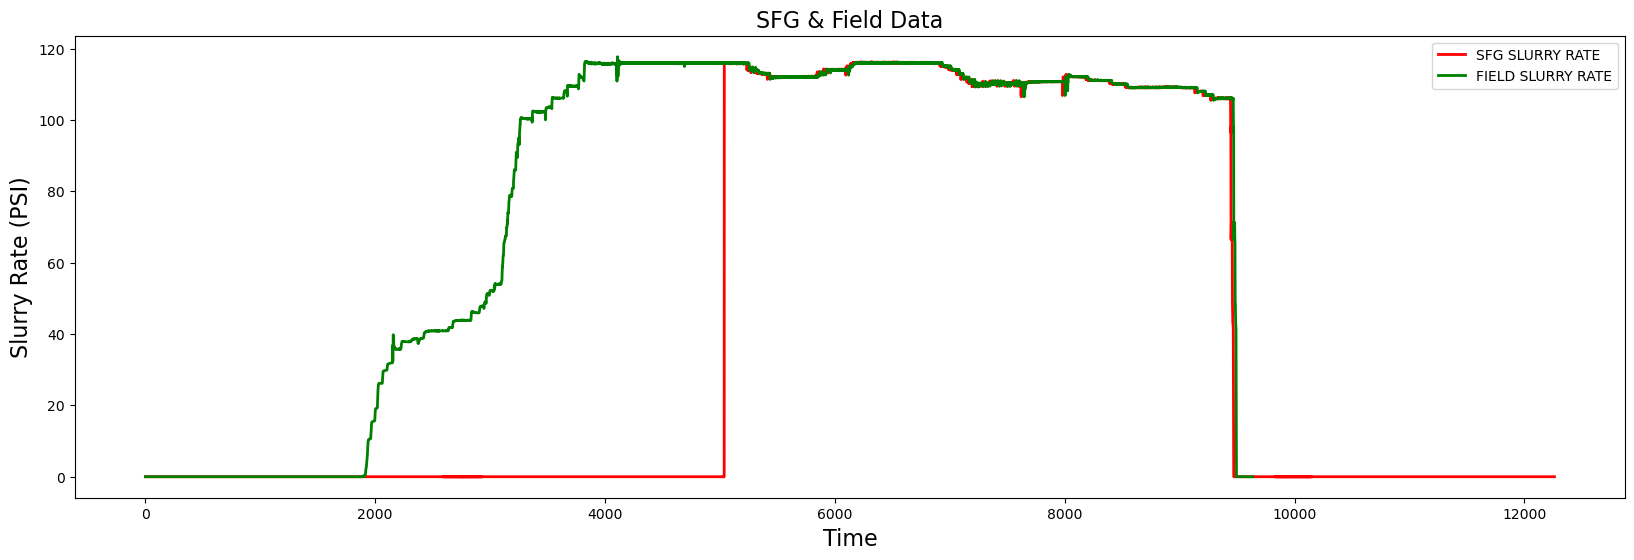

In [7]:
# Plotting Close Value Data
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(df_sfg_emtpyrows.index.values, df_sfg_emtpyrows['Slurry Rate'].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field.index.values, df_field['SlurryRate'].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

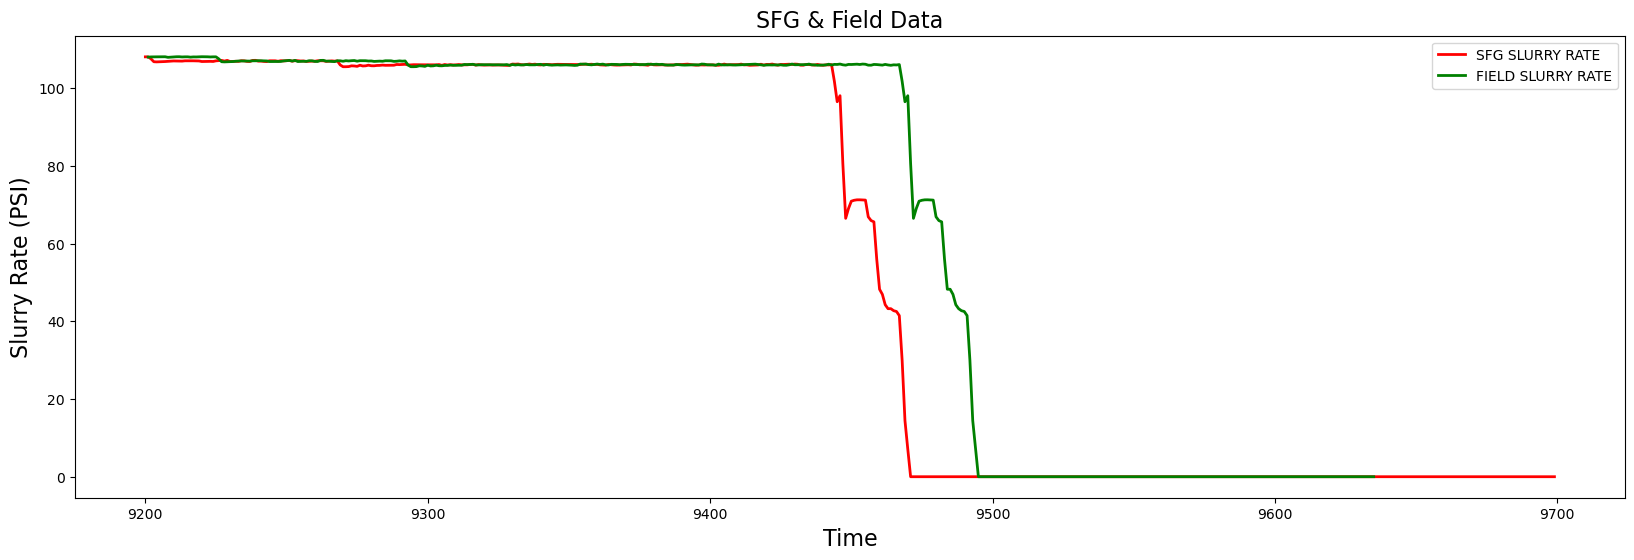

In [9]:
# Plotting Close Value Data ZOOM
start_date = 9200
end_date = 9700
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(df_sfg_emtpyrows[start_date:end_date].index.values, df_sfg_emtpyrows['Slurry Rate'][start_date:end_date].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field[start_date:end_date].index.values, df_field['SlurryRate'][start_date:end_date].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()